In [1]:
import tensorflow as tf

In [60]:
# importing digit mnist dataset
(x_train,y_train),(x_test, y_test) = tf.keras.datasets.mnist.load_data()

In [61]:
x_train.shape, y_train.shape, x_test.shape, y_test.shape

((60000, 28, 28), (60000,), (10000, 28, 28), (10000,))

Text(0.5, 1.0, '2')

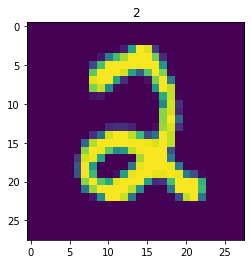

In [62]:
#visualizing the  data
import matplotlib.pyplot as plt
import random


n = random.randint(1, 60000)

plt.imshow(x_train[n])
plt.title(y_train[n])



In [63]:
# normalizing the data

x_train = x_train/255
x_test = x_test/255

In [64]:
# creating noise with the same dimiesion of the original image

noise = np.random.randn( *(28,28))

noise.shape

(28, 28)

In [65]:
# adding factor to the noise
noise_factor = 0.2
fac_noise = noise_factor * noise

fac_noise.shape

(28, 28)

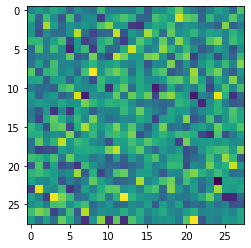

In [66]:
# visualizing the noise

plt.imshow(fac_noise)

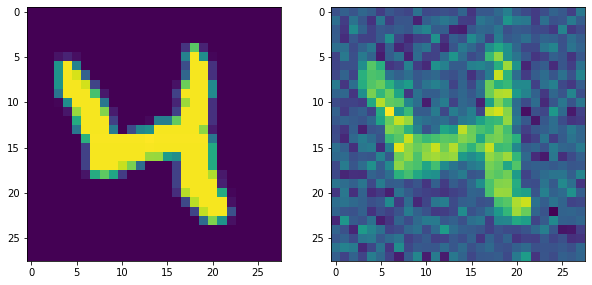

In [67]:
# adding noise to a sample image
plt.figure(figsize=(10,10))
sample_image = x_train[20]
sample_image_noise = sample_image + noise_factor * noise
plt.subplot(1,2,1)
plt.imshow(sample_image)
plt.subplot(1,2,2)
plt.imshow(sample_image_noise)

In [68]:
sample_image_noise.max()

1.4986204885505012

In [69]:
sample_image_noise.min()

-0.5802349498161755

In [70]:
# clipping the image in range 0 and 1

sample_image_clipped = np.clip(sample_image_noise, 0.0, 1.0)



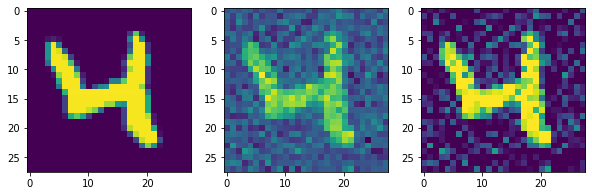

In [71]:
# visualizing the images

plt.figure(figsize=(10,10))

plt.subplot(1,3,1)
plt.imshow(sample_image)
plt.subplot(1,3,2)
plt.imshow(sample_image_noise)
plt.subplot(1,3,3)
plt.imshow(sample_image_clipped)
plt.show()

In [72]:
# adding noise to the train data

x_train_noise = []
noise = np.random.randn( *(28,28))
noise_factor = 0.2

for image in x_train:
  noise_image = image + noise_factor * noise
  noise_image = np.clip(noise_image, 0.0, 1.0)
  x_train_noise.append(noise_image)

In [73]:
# converting list to array
x_train_noise = np.array(x_train_noise)

x_train_noise.shape

(60000, 28, 28)

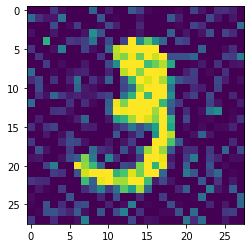

In [77]:
# visualizing train data

plt.imshow(x_train_noise[10])


In [74]:
# adding noise to test data

x_test_noise = []
noise = np.random.randn(*(28,28))
noise_factor = 0.2

for image in x_test:
  noise_image = image + noise_factor * noise
  noise_image = np.clip(noise_image, 0.0, 1.0)
  x_test_noise.append(noise_image)

In [76]:
x_test_noise = np.array(x_test_noise)

x_test_noise.shape

(10000, 28, 28)

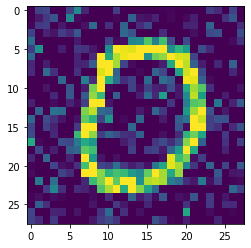

In [78]:
# visualizing the test data

plt.imshow(x_test_noise[10])

In [81]:
# building the autoencoder model
import tensorflow as tf
from tensorflow.keras import layers
model = tf.keras.Sequential([
                             # encoder
                             layers.Conv2D(filters= 16,kernel_size= 3, strides= 1, padding= "same", input_shape =(28,28,1)),
                             layers.MaxPooling2D(pool_size= 2, padding="same"),
                             layers.Conv2D(filters= 8, kernel_size= 3, strides= 1, padding = "same"),
                             layers.MaxPooling2D(pool_size= 2, padding = "same"),
                             layers.Conv2D(filters= 8, kernel_size= 3, padding = "same"),

                             # decoder
                             layers.UpSampling2D(size= 2),
                             layers.Conv2DTranspose(filters= 8, kernel_size= 3, strides= 1, padding="same"),
                             layers.UpSampling2D(size= 2),
                             layers.Conv2DTranspose(filters= 1, kernel_size= 3, strides = 1, activation= "sigmoid", padding = "same")
])


In [82]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 28, 28, 16)        160       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 14, 14, 16)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 14, 14, 8)         1160      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 7, 7, 8)           0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 7, 7, 8)           584       
_________________________________________________________________
up_sampling2d (UpSampling2D) (None, 14, 14, 8)         0         
_________________________________________________________________
conv2d_transpose (Conv2DTran (None, 14, 14, 8)         5

In [87]:
# compiling the model
model.compile(
    loss = tf.keras.losses.binary_crossentropy,
    optimizer = tf.keras.optimizers.Adam(learning_rate= 0.001),
    metrics = ["accuracy"]
    
)

In [88]:
# fitting the data

model.fit(x_train_noise.reshape(-1,28,28,1),
          x_train.reshape(-1,28,28,1),
          epochs = 10,
          batch_size = 200)

Epoch 1/10
300/300 [==============================] - 42s 138ms/step - loss: 0.0832 - accuracy: 0.8148
Epoch 2/10
300/300 [==============================] - 41s 137ms/step - loss: 0.0823 - accuracy: 0.8148
Epoch 3/10
300/300 [==============================] - 41s 138ms/step - loss: 0.0818 - accuracy: 0.8149
Epoch 4/10
300/300 [==============================] - 41s 138ms/step - loss: 0.0813 - accuracy: 0.8149
Epoch 5/10
300/300 [==============================] - 41s 138ms/step - loss: 0.0809 - accuracy: 0.8149
Epoch 6/10
300/300 [==============================] - 41s 137ms/step - loss: 0.0805 - accuracy: 0.8149
Epoch 7/10
300/300 [==============================] - 41s 137ms/step - loss: 0.0802 - accuracy: 0.8149
Epoch 8/10
300/300 [==============================] - 41s 137ms/step - loss: 0.0799 - accuracy: 0.8150
Epoch 9/10
300/300 [==============================] - 41s 137ms/step - loss: 0.0797 - accuracy: 0.8150
Epoch 10/10
300/300 [==============================] - 41s 137ms/step - l

In [89]:
# evaluating the model
predicted_image = model.predict(x_test_noise[:10].reshape(-1,28,28,1))

In [90]:
predicted_image.shape

(10, 28, 28, 1)

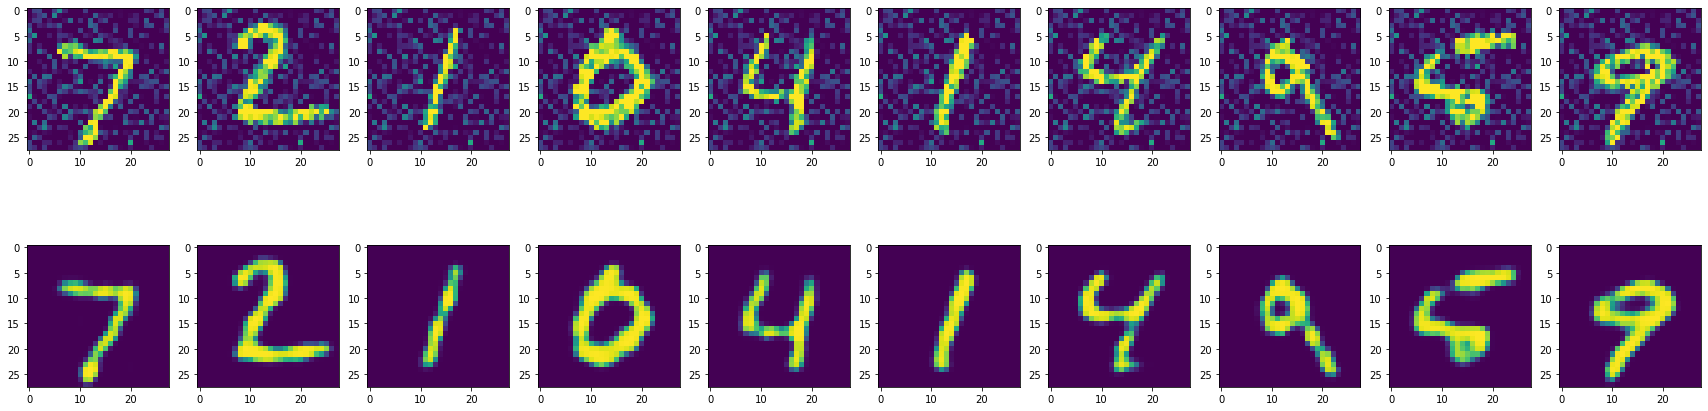

In [92]:
# visualizing the result

fig, axes = plt.subplots(nrows= 2, ncols= 10, figsize = (30,8))

for images, row in zip([x_test_noise[:10], predicted_image], axes):
  for img, ax in zip(images, row):
    ax.imshow(img.reshape((28,28)))